In [1]:
import pandas as pd

In [2]:
ri = pd.read_csv('https://assets.datacamp.com/production/repositories/1497/datasets/62bd9feef451860db02d26553613a299721882e8/police.csv')

In [3]:
ri.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [4]:
ri.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [5]:
ri.shape

(91741, 15)

In [6]:
ri.drop(['county_name', 'state'], axis='columns', inplace=True)

In [7]:
ri.shape

(91741, 13)

In [8]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [9]:
ri.dropna(subset=['driver_gender'], inplace=True) # dropping all rows without driver_gender proper data

In [10]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64

In [11]:
ri.shape

(86536, 13)

In [12]:
ri.dtypes # checking type of data for each column 

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

In [13]:
ri['is_arrested'] = ri.is_arrested.astype(bool) 

In [14]:
ri['is_arrested'].dtype

dtype('bool')

In [15]:
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ') # I will concat two columns stop_date and stop_time 

In [16]:
ri['stop_datetime'] = pd.to_datetime(combined)

In [17]:
print(ri.dtypes)

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object


In [18]:
ri.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,stop_datetime
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-01-04 12:55:00
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,2005-01-23 23:15:00
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-02-17 04:15:00
3,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,2005-02-20 17:15:00
4,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,2005-02-24 01:20:00


In [19]:
ri.set_index('stop_datetime', inplace=True)

In [20]:
ri.index

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)

In [21]:
ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')

In [22]:
ri['violation'].value_counts()

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64

In [23]:
ri['violation'].value_counts()/ri['violation'].value_counts().sum() # checking proportion of violation types 

Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64

## 1. Men or Women - which group tend to commit which type of traffic violation ? 

In [24]:
female = ri[ri.driver_gender=='F']
male = ri[ri.driver_gender=='M']

In [25]:
female.violation.value_counts()/female.violation.value_counts().sum()

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64

In [26]:
male.violation.value_counts()/male.violation.value_counts().sum()

Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64

## 2. What percentage of stops resulted in a "Citation" (meaning a ticket) versus a "Warning" ?

In [27]:
female_and_speeding = ri[(ri.driver_gender=='F') & (ri.violation == 'Speeding')]
male_and_speeding = ri[(ri.driver_gender=='M') & (ri.violation == 'Speeding')]

In [28]:
female_and_speeding['stop_outcome'].value_counts(normalize=True)/female_and_speeding['stop_outcome'].value_counts(normalize=True).sum()

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64

In [29]:
male_and_speeding['stop_outcome'].value_counts(normalize=True)/male_and_speeding['stop_outcome'].value_counts(normalize=True).sum()

Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64

Both men and women - 95% of total received ticket 

## 3. Whether the search rate varies by driver gender? 

In [30]:
ri.search_conducted.value_counts(normalize=True)
ri.search_conducted.mean()

0.0382153092354627

Search rate is in general for 3,8% . Now I will compare by gender: 

In [31]:
ri[ri.driver_gender == 'F'].search_conducted.mean()

0.019180617481282074

In [32]:
ri[ri.driver_gender == "M"].search_conducted.mean()

0.04542557598546892

In [33]:
ri.groupby(['violation','driver_gender']).search_conducted.mean() # we can also check how it differ by violation type 

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

# 4. Does frisk matters in data ?  

In [34]:
ri['search_type'].value_counts()

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Probable Cause,Protective Frisk                               35
Incident to Arrest,Inventory,Probable Cause                   35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

In [35]:
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na= False)
ri['frisk'].sum()

303

We know that in total 303 drivers were frisked.  Now we will check how does it distribute by gender?  

In [36]:
searched = ri[ri.search_conducted == True]
searched.groupby('driver_gender').frisk.mean()

driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64

Male's rate (9,4 %)  of frisking is higher that female's (7,5%)

## 5. Hourly arrested rate

In [37]:
ri.is_arrested.mean() 

0.0355690117407784

In [38]:
ri.groupby(ri.index.hour).is_arrested.mean()

stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64

In [39]:
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

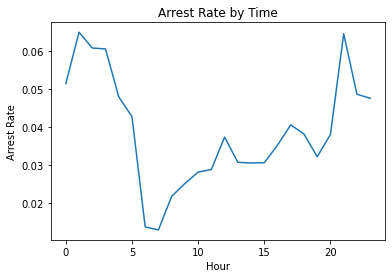

In [40]:
import matplotlib.pyplot as plt 
hourly_arrest_rate.plot()
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time')
plt.show()

## 6. How drug relates to stop date_time?  

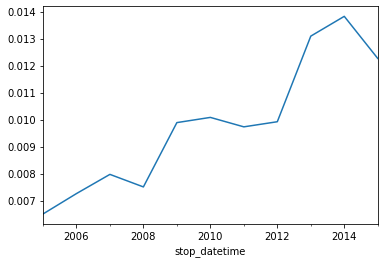

In [41]:
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()
annual_drug_rate.plot()
plt.show()

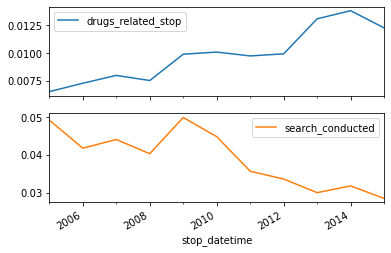

In [42]:
annual_search_rate = ri.search_conducted.resample('A').mean()
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')
annual.plot(subplots=True)
plt.show()

## 7. How many violations of each type took place in each of the six zones?

In [43]:
all_zones = pd.crosstab(ri.district,ri.violation)
k_zones = all_zones.loc['Zone K1':'Zone K3']

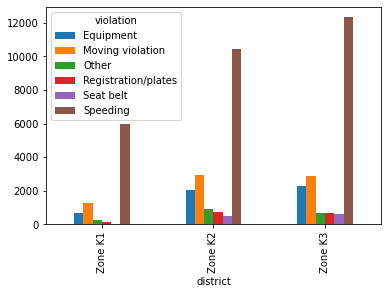

In [44]:
k_zones.plot(kind='bar')
plt.show()

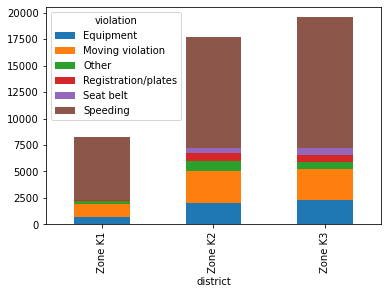

In [45]:
k_zones.plot(kind= 'bar', stacked=True)
plt.show()

## 8.How long  you might be stopped for a violation?

In [46]:
mapping = {'0-15 Min':8, '16-30 Min':23,'30+ Min':45 }
ri['stop_minutes'] = ri.stop_duration.map(mapping)
ri.stop_minutes.unique()

array([ 8, 23, 45], dtype=int64)

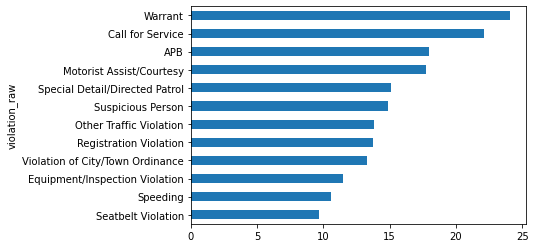

In [47]:
stop_length = ri.groupby('violation_raw').stop_minutes.mean()
stop_length.sort_values().plot(kind='barh')
plt.show()

## 9. Does weather may have impact on Police Activity?  

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


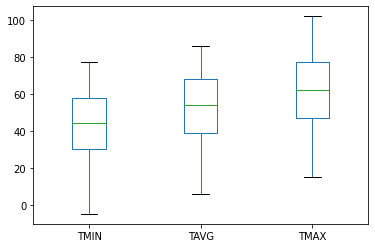

In [48]:
weather = pd.read_csv('https://assets.datacamp.com/production/repositories/1497/datasets/02f3fb2d4416d3f6626e1117688e0386784e8e55/weather.csv')
print(weather[['TMIN', 'TAVG', 'TMAX']].describe())
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box')
plt.show()

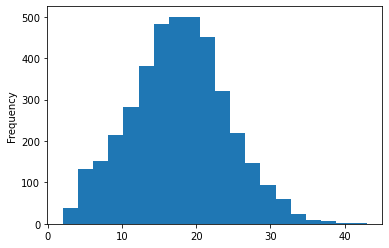

In [49]:
weather['TDIFF'] = weather['TMAX']- weather['TMIN']
weather.TDIFF.plot(kind = 'hist', bins=20)
plt.show()

 - let's check bad conditions 

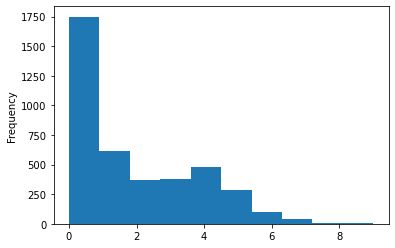

In [50]:
WT = weather.loc[:,'WT01':'WT22']
weather['bad_conditions'] = WT.sum(axis='columns')
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')
weather['bad_conditions'].plot(kind = 'hist')
plt.show()

In [51]:
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}
weather['rating'] = weather.bad_conditions.map(mapping)
print(weather.rating.value_counts())

bad      1836
good     1749
worse     432
Name: rating, dtype: int64


- creating few categories for better understandin data 

In [52]:
weather.rating.memory_usage(deep=True)
cats = ['good','bad', 'worse' ]
cat_dtype = pd.api.types.CategoricalDtype(ordered=True, categories=cats)
weather['rating'] = weather.rating.astype(cat_dtype)
weather['rating'].head()

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): [good < bad < worse]

- we will  merge two dateframes 

In [54]:
ri.reset_index(inplace=True)
weather_rating = weather[['DATE', 'rating']]

In [55]:
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')
ri_weather.set_index('stop_datetime', inplace=True)

- Comparing arrest rates by weather rating

In [56]:
ri_weather.is_arrested.mean()

0.0355690117407784

In [57]:
ri_weather.groupby('rating').is_arrested.mean()

rating
good     0.033715
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64

In [58]:
ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64